In [1]:
import pandas as pd
%matplotlib inline

#判断是否为人类面部的数据
skin = pd.read_excel(r'Skin_Segment.xlsx')

In [2]:
skin.y = skin.y.map({2:0,1:1})
skin.y.value_counts()

0    194198
1     50859
Name: y, dtype: int64

In [3]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(skin.iloc[:,:3], skin.y, 
                                                                 test_size = 0.25, random_state=1234)

In [4]:
# bayes
from sklearn import naive_bayes

# 调用高斯朴素贝叶斯分类器的“类”
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
pd.Series(gnb_pred).value_counts()

0    50630
1    10635
dtype: int64

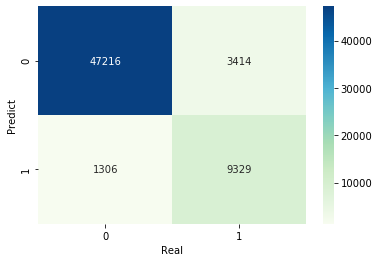

模型的准确率为：
 0.9229576430261976
模型的评估报告：
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     48522
           1       0.88      0.73      0.80     12743

    accuracy                           0.92     61265
   macro avg       0.90      0.85      0.88     61265
weighted avg       0.92      0.92      0.92     61265



In [5]:
# 指标衡量
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

cm = pd.crosstab(gnb_pred,y_test)
sns.heatmap(cm, annot = True, cmap = 'GnBu', fmt = 'd')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()
print('模型的准确率为：\n',metrics.accuracy_score(y_test, gnb_pred))
print('模型的评估报告：\n',metrics.classification_report(y_test, gnb_pred))

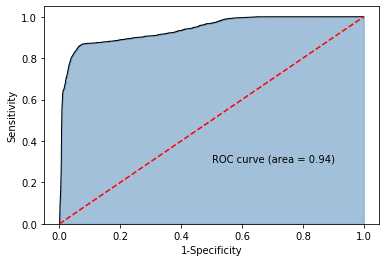

In [6]:
# 计算正例的预测概率，用于生成ROC曲线的数据
y_score = gnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# AUC VALUE
roc_auc = metrics.auc(fpr,tpr)

plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [7]:
# 判断蘑菇是否有毒的数据
mushrooms = pd.read_csv(r'mushrooms.csv')
mushrooms.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


In [8]:
# 将字符型数据作因子化处理，将其转换为整数型数据
columns = mushrooms.columns[1:]
for column in columns:
    mushrooms[column] = pd.factorize(mushrooms[column])[0]
mushrooms.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,edible,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,edible,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,poisonous,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,edible,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [9]:
# split data
Predictors = mushrooms.columns[1:]
X_train,X_test,y_train,y_test = model_selection.train_test_split(mushrooms[Predictors], mushrooms['type'], 
                                                                 test_size = 0.25, random_state = 10)

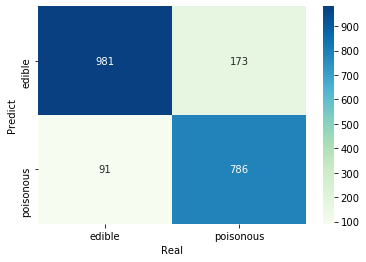

模型的准确率为：
 0.8700147710487445
模型的评估报告：
               precision    recall  f1-score   support

      edible       0.85      0.92      0.88      1072
   poisonous       0.90      0.82      0.86       959

    accuracy                           0.87      2031
   macro avg       0.87      0.87      0.87      2031
weighted avg       0.87      0.87      0.87      2031



In [10]:
# 构建多项式贝叶斯分类器的“类”
mnb = naive_bayes.MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
cm = pd.crosstab(mnb_pred, y_test)
sns.heatmap(cm, annot = True, cmap = 'GnBu', fmt = 'd')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

print('模型的准确率为：\n',metrics.accuracy_score(y_test, mnb_pred))
print('模型的评估报告：\n',metrics.classification_report(y_test, mnb_pred))

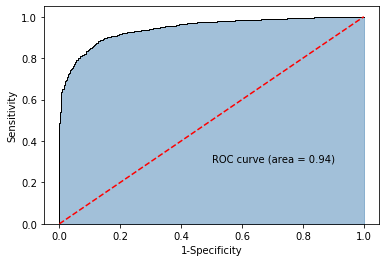

In [11]:
# 绘图
y_score = mnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test.map({'edible':0,'poisonous':1}), y_score)
roc_auc = metrics.auc(fpr,tpr)

plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [12]:
# 评论数据
evaluation = pd.read_excel(r'Contents.xlsx')
evaluation.head(10)

,NickName,Date,Content,Type
0,AdJQKzNaZWAV,2016-04-14 23:30:42,想知道是不是卖家给我发错货了，怎么四个连接铁通的仅一个能连上，**块钱的东西说便宜也不至于廉...,Negative
1,sdmjk,2013-06-24 22:37:51,垃圾。\n两个管两头一样粗，得自己用钳子摄细才能装上\n管子很软很细\n总的评价 - 就是两...,Negative
2,f***n,2015-06-05 21:10:31,我就无语了...难弄到死..又没说明书..过段差评..,Negative
3,jd_817039867,2014-04-13 22:43:38,不满意，明明写的落地！结果差一截！而且自垂度不怎么好～还要用夹子夹！没有我在附近小超市买的质...,Negative
4,jd_wscj529,2014-06-09 13:06:17,标的次日到达，结果快递用了四天，蚊帐杆底座太小，管壁太薄，而且蚊帐也没宣传那么垂地，此次购物...,Negative
5,q***r,2017-04-25 00:24:25,真的很好，比超市卖的便宜多了，刚回来打算在买个给我嫂子家，发货也很快没想到这么便宜也能买的这...,Positive
6,A***波,2017-05-11 06:53:47,最不满意的一次网购。直接看图。1.8的床两头1.8中间只有1.5了，两边的纱像少了一截，绷得...,Negative
7,巴***住,2017-05-15 11:05:01,很不错的，就是拉丝不够好啊,Positive
8,j***w,2016-05-15 09:25:49,薄，漂亮,Positive
9,1***n,2017-05-15 09:00:43,味道有点大，线头有点多。装好后有点摇晃，拉链处开了几处，要不是等着急用，真心是要退,Positive


In [13]:
evaluation.Content = evaluation.Content.str.replace('[0-9a-zA-Z]','')
evaluation.head()

,NickName,Date,Content,Type
0,AdJQKzNaZWAV,2016-04-14 23:30:42,想知道是不是卖家给我发错货了，怎么四个连接铁通的仅一个能连上，**块钱的东西说便宜也不至于廉...,Negative
1,sdmjk,2013-06-24 22:37:51,垃圾。\n两个管两头一样粗，得自己用钳子摄细才能装上\n管子很软很细\n总的评价 - 就是两...,Negative
2,f***n,2015-06-05 21:10:31,我就无语了...难弄到死..又没说明书..过段差评..,Negative
3,jd_817039867,2014-04-13 22:43:38,不满意，明明写的落地！结果差一截！而且自垂度不怎么好～还要用夹子夹！没有我在附近小超市买的质...,Negative
4,jd_wscj529,2014-06-09 13:06:17,标的次日到达，结果快递用了四天，蚊帐杆底座太小，管壁太薄，而且蚊帐也没宣传那么垂地，此次购物...,Negative


In [14]:
import jieba

with open(r'mystopwords.txt', encoding='UTF-8') as words:
    stop_words = [i.strip() for i in words.readlines()]

def cut_word(sentence):
    words = [i for i in jieba.lcut(sentence) if i not in stop_words]
    # 切完的词用空格隔开
    result = ' '.join(words)
    return(result)
words = evaluation.Content.apply(cut_word)
words[:5]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\honlley\AppData\Local\Temp\jieba.cache
Loading model cost 1.090 seconds.
Prefix dict has been built successfully.


0                  想 卖家 给我发 错货 四个 连接 铁通 块钱 便宜 廉价 退货
1        垃圾 \n 钳子 摄细 装 \n 管子 很软 很细 \n 评价         垃圾
2                          无语 难弄 .. 说明书 .. 过段 差评 ..
3    不 满意 写 落地 差一截 垂度 ～ 夹子 夹 没有 超市 买 质量 换季 卖得 价钱 便宜
4         标的 到达 快递 四天 蚊帐 底座 太小 管壁 太薄 蚊帐 宣传 垂地 购物 失败
Name: Content, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# 计算每个词在各评论内容中的次数，并将稀疏度为99%以上的词删除
counts = CountVectorizer(min_df=0.01)
# 文档词条矩阵
dtm_counts = counts.fit_transform(words).toarray()
# 矩阵的列名称
columns = counts.get_feature_names()
# 将矩阵转换为数据框--即X变量
X = pd.DataFrame(dtm_counts, columns=columns)
# 情感标签变量
y = evaluation.Type
X.head()

,一根,下单,不值,不好,不想,不行,不错,买回来,产品,京东,...,购买,购物,还好,退货,送货,速度,钢管,防蚊,颜色,麻烦
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


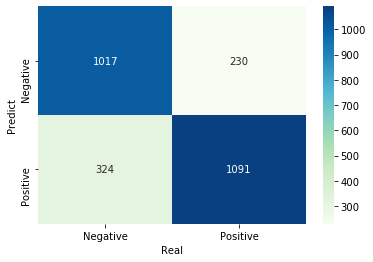

模型的准确率为：
 0.791885800150263
模型的评估报告：
               precision    recall  f1-score   support

    Negative       0.82      0.76      0.79      1341
    Positive       0.77      0.83      0.80      1321

    accuracy                           0.79      2662
   macro avg       0.79      0.79      0.79      2662
weighted avg       0.79      0.79      0.79      2662



In [16]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.25, random_state=1)
# 伯努利贝叶斯分类器
bnb = naive_bayes.BernoulliNB()
bnb.fit(X_train,y_train)
bnb_pred = bnb.predict(X_test)
cm = pd.crosstab(bnb_pred,y_test)
sns.heatmap(cm, annot = True, cmap = 'GnBu', fmt = 'd')
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()

print('模型的准确率为：\n',metrics.accuracy_score(y_test, bnb_pred))
print('模型的评估报告：\n',metrics.classification_report(y_test, bnb_pred))

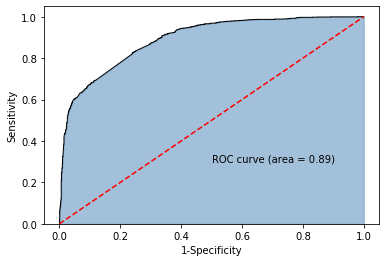

In [17]:
# 计算正例Positive所对应的概率，用于生成ROC曲线的数据
y_score = bnb.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test.map({'Negative':0,'Positive':1}), y_score)
roc_auc = metrics.auc(fpr,tpr)

plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()